<a href="https://colab.research.google.com/github/Wayn-Git/CatvsDog/blob/master/catDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/Wayn-Git/CatvsDog

Cloning into 'CatvsDog'...
remote: Enumerating objects: 10018, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10018 (delta 0), reused 4 (delta 0), pack-reused 10011 (from 1)
Receiving objects: 100% (10018/10018), 215.76 MiB | 36.83 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (10035/10035), done.


In [8]:
%cd CatvsDog

/content/CatvsDog/CatvsDog


# Importing Libraries

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_dir = "/content/CatvsDog/Data/train"
test_dir = "/content/CatvsDog/Data/test"

trainGen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1)
testGen = ImageDataGenerator(rescale=1./255)


train_gen = trainGen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="binary")
test_gen = testGen.flow_from_directory(test_dir, batch_size=3 , target_size=(224, 224), class_mode="binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
print("Training samples:", train_gen.samples)
print("Test samples:", test_gen.samples)
print("Class indices:", train_gen.class_indices)

Training samples: 8005
Test samples: 2023
Class indices: {'cats': 0, 'dogs': 1}


In [12]:
model = models.Sequential([
    layers.Input(shape=(224,224,3)),


    Conv2D(32 , (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation = 'relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),



    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')

])

In [13]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,813,633 (25.99 MB)

 Trainable params: 6,812,417 (25.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [15]:
history = model.fit(train_gen,
                    epochs=50,
                    validation_data=test_gen,
                    verbose=1,
                    steps_per_epoch=train_gen.samples // train_gen.batch_size,
                    validation_steps=test_gen.samples // test_gen.batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 130s 467ms/step - accuracy: 0.5790 - loss: 0.7978 - val_accuracy: 0.4995 - val_loss: 2.5730
Epoch 2/50
  1/250 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.5625 - loss: 0.6826

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5625 - loss: 0.6826 - val_accuracy: 0.4995 - val_loss: 2.5337
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 523ms/step - accuracy: 0.6426 - loss: 0.6630 - val_accuracy: 0.5049 - val_loss: 1.3222
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6250 - loss: 0.6851 - val_accuracy: 0.5049 - val_loss: 1.3192
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 541ms/step - accuracy: 0.7027 - loss: 0.5850 - val_accuracy: 0.6800 - val_loss: 0.6715
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6875 - loss: 0.5859 - val_accuracy: 0.6864 - val_loss: 0.6679
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 416ms/step - accuracy: 0.7066 - loss: 0.5667 - val_accuracy: 0.6409 - val_loss: 0.9045
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7500 - loss: 0.4559 - val_accuracy: 0.6395 - val_loss: 0.9123
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 434ms/step - accuracy: 0.7487 - loss: 0.5235 - val_acc

In [16]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8104 - loss: 0.6222
Test Accuracy: 0.8003
Test Loss: 0.6537


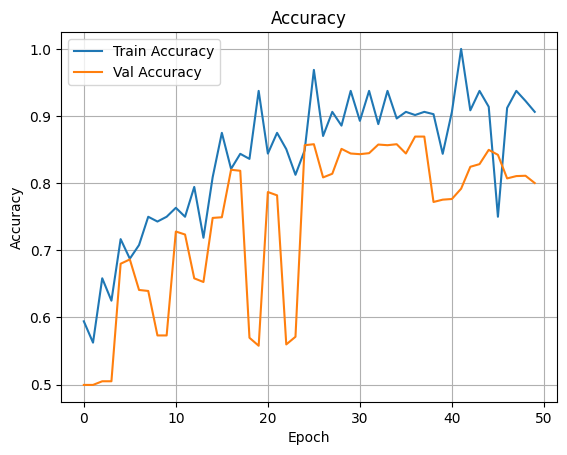

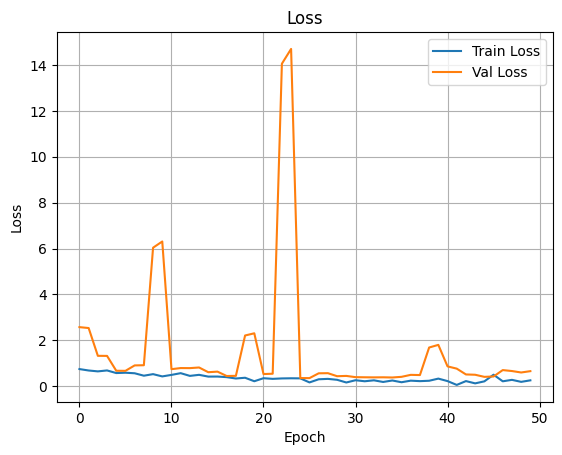

In [17]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [19]:
import os
os.makedirs("model", exist_ok=True)

In [20]:
model.save("model/cat_dog_model.keras")

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/content/CatvsDog/Data/test/cats/cat.4001.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Predicted: Dog 🐶")
else:
    print("Predicted: Cat 🐱")


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 50176, but received input with shape (1, 20736)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150, 150, 3), dtype=float32)
  • training=False
  • mask=None